<h1><b>Modelo 02</b></h1>
<h4>Desarrollado por: Cristian Gonzaga López &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  A01745134 </h4>

### Librerias

In [ ]:
from pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import pandas as pd

import random
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split 

### Método

#### Lectura de Datos.

Dado que era necesario importar nuestras imágenes, se decidió hacer dicho proceso en otro *notebook* de *Google Colaboratory* para no consumir un gran costo computacional en el presente trabajo. 

**DESCRIBIR QUÉ SE HIZO EN EL OTRO**

Este se encuentra en el siguiente enlace: https://colab.research.google.com/drive/1ECadGdtapWtiVEgds8kzr9WVVdsOQqb_?usp=sharing

En primer lugar, es necesario importar los datos.

In [ ]:
# Montar Drive en Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lectura de datos.
root = '/content/drive/Shareddrives/Cleto_Gonzaga/'

train_images = np.load(root + 'train_images.npy') # Obtener los datos (imágenes) de entrenamiento.
test_images = np.load(root + 'test_images.npy') # Obtener los datos (imágenes) de prueba.

train_labels = np.load(root + 'train_labels.npy') # Obtener las etiquetas (labels) de los datos de entrenamiento.
test_labels = np.load(root + 'test_labels.npy') # Obtener las etiquetas (labels) de los datos de prueba.

In [ ]:
# Imprimir cuántos datos se tienen en cada conjunto de datos.
print("Número total de datos:\n",
      "Entrenamiento",train_images.shape[0],"\n",
      "Prueba",test_images.shape[0],"\n")

# Imprimir las dimensiones de nuestras imágenes.
print("Dimensiones de los datos:\n",
      "Entrenamiento:",train_images.shape[1:],"\n",
      "Prueba:",test_images.shape[1:],"\n")

Número total de datos:
 Entrenamiento 9910 
 Prueba 1100 

Dimensiones de los datos:
 Entrenamiento: (128, 128, 3) 
 Prueba: (128, 128, 3) 



Apreciando así que se tienen 9910 y 1100 datos de imágenes para los datos entrenamiento y de prueba, respectivamente.

Dichas cifras corresponden al número de imágenes total, dado que los datos de entrenamiento constaban de 11 subcarpetas (cada una representando una clase) con apróximadamente 900 imágenes cada uno y los datos de prueba también eran 11 subcarpetas, pero cada una con 100 imágenes (en total 1100).

Además, dichos datos están representados como una matriz de 128 x 128 y tienen escala de colores.

Por último, es pertinente recordar que las clases de nuestro conjunto de datos son: 

1. apple_pie.
2. cheesecake.
3. chicken_curry.
4. french_fries. 
5. fried_rice. 
6. hamburger. 
7. hot_dog.
8. ice_cream. 
9. omelette. 
10. pizza. 
11. sushi.

Dado que consideramos nuestros datos de entrenamiento y prueba no están balanceado de manera adecuada, puesto que están divididos en 90 - 10, se consideró pertinente rehacer dicha división, pero ahora a 70 - 30 para los datos de entrenamiento y prueba, respectivamente.

In [ ]:
images = np.concatenate([train_images,test_images]) # Concatenar los datos divididos en un solo conjunto.
labels = np.concatenate([train_labels,test_labels]) # Concatenar las etiquetas divididas en un solo conjunto.

# Dividir los datos en conjuntos de entrenamiento y prueba en una proporción 70 - 30.
train_images, test_images, train_labels, test_labels = train_test_split(images,labels,
                                                                        test_size=0.3,
                                                                        random_state=123) # Definir semilla para reproducibilidad.

In [ ]:
# Imprimir cuántos datos se tienen en cada conjunto de datos.
print("Número total de datos:\n",
      "Entrenamiento",train_images.shape[0],"\n",
      "Prueba",test_images.shape[0],"\n")

# Imprimir las dimensiones de nuestras imágenes.
print("Dimensiones de los datos:\n",
      "Entrenamiento:",train_images.shape[1:],"\n",
      "Prueba:",test_images.shape[1:],"\n")

Número total de datos:
 Entrenamiento 7707 
 Prueba 3303 

Dimensiones de los datos:
 Entrenamiento: (128, 128, 3) 
 Prueba: (128, 128, 3) 



Obteniendo así una división más balanceada.

#### Implementación de modelo.

Para evitar el sobreajuste (*overfitting*, por su traducción al inglés) se implementaron técncias como *data augmentation*, *Batch Normalization* y *Dropout*.

*Data Augmentation* es una técnica de aumento de datos para incrementar la diversidad del conjunto de entrenamiento mediante la aplicación de transformaciones aleatorias de las mismas, pero realistas, como la rotación de la imágen.

In [ ]:
data_augmentation = keras.Sequential([
    # Girar a las imágenes de modo horizontal. Recibe imágenes de dimensiones (128,128,3)
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(128,128,3)),

    # Rotar a las imágenes en sentido horario y antihorario.
    layers.experimental.preprocessing.RandomRotation(0.1),

    # Hacer zoom a las imágenes.
    layers.experimental.preprocessing.RandomZoom(0.1),
])

Ahora, en el siguiente bloque de código se muestra el modelo de la red neuronal convolucional.

In [ ]:
# Build the Sequential convolutional neural network model

# Definir desde el constructor.
model = Sequential([
    # Implementación de data augmentation
    data_augmentation,

    # Capa convolucional 2D con un kernel de 3 x 3 y 32 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro).
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128,128,3)),
    BatchNormalization(), # Normalizar los datos para cada batch.

    # Capa convolucional 2D con un kernel de 3 x 3 y 32 filtros. Función de activación ReLu. Padding igual a same.
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(), # Normalizar los datos para cada batch.
    MaxPooling2D((2, 2)), # Tamaño de la ventana de 2 x 2 - Reduce el tamaño de la imagen a la mitad.
    Dropout(0.2), # Fracción (0.2) de los filtros a "apagar".
    
    # Capa convolucional 2D con un kernel de 3 x 3 y 64 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro). 
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(), # Normalizar los datos para cada batch.

    # Capa convolucional 2D con un kernel de 3 x 3 y 64 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro).
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(), # Normalizar los datos para cada batch.
    MaxPooling2D((2, 2)), # Tamaño de la ventana de 2 x 2 - Reduce el tamaño de la imagen a la mitad.
    Dropout(0.3), # Fracción (0.3) de los filtros a "apagar".
    
    # Capa convolucional 2D con un kernel de 3 x 3 y 128 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro).
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(), # Normalizar los datos para cada batch.

    # Capa convolucional 2D con un kernel de 3 x 3 y 128 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro).
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(), # Normalizar los datos para cada batch.
    MaxPooling2D((2, 2)), # Tamaño de la ventana de 2 x 2 - Reduce el tamaño de la imagen a la mitad.
    Dropout(0.4), # Fracción (0.4) de los filtros a "apagar".
    
    # Capa plana para obtener una entrada unidimensional.
    Flatten(),

    # Capa densa de 128 neuronas. Función de activación relu 
    Dense(128, activation='relu'),
    BatchNormalization(), # Normalizar los datos para cada batch.
    Dropout(0.5), # Fracción (0.5) de las neuronas a "apagar".

    # Capa densa de 11 neuronas. Functión de activación softmax.
    Dense(11, activation='softmax')

])

Asimismo, se empleó *Adam* con un learning rate de 0.001 como optimizador, y la métrica para evaluar nuestro modelo será la precisión, mientras que para evaluar la pérdida se usará *sparse categorical crossentropy*.

In [ ]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizador Aman con un learning rate de 0.001
acc = tf.keras.metrics.SparseCategoricalAccuracy() # Precisión de nuestro modelo.

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc]) # Función de pérdida - Sparse categorical crossentropy.

Asimismo, una mejor comprensión de los datos de entrada y de salida del modelo se muestra el siguiente gráfico.

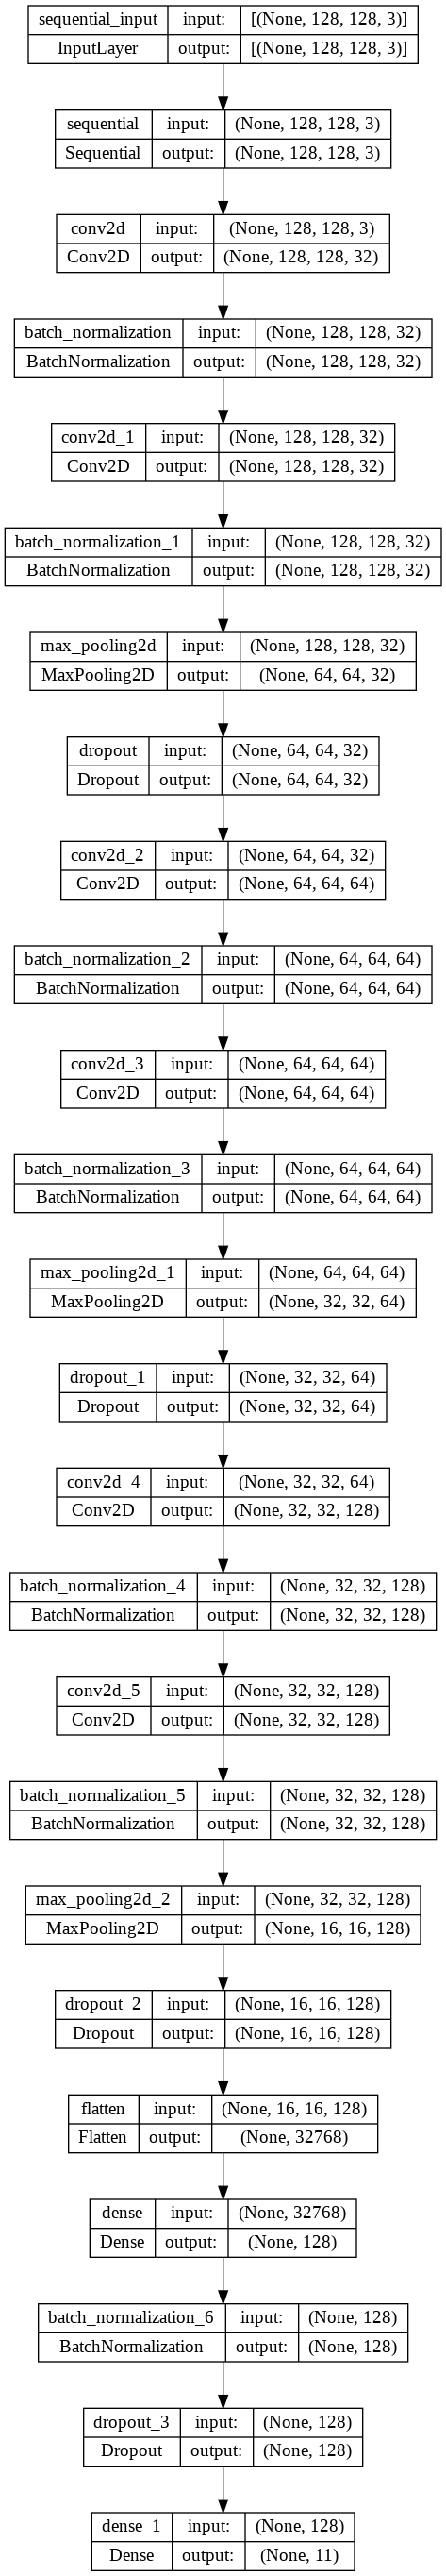

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Asimismo, se definieron las siguientes semillas para reproducibilidad.

In [ ]:
seed = 123
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

Además, decidió implementarse un método *Early Stopping* en el modelo. Dicho método interrumpirá el entrenamiento cuando no mida ningún progreso en el conjunto de validación durante un cierto número de épocas, y opcionalmente retrocederá al mejor modelo al final.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) # monitor ='val_loss' 

Por último decidieron utilizaron 50 *epochs* para el entrenamiento del modelo. Sin embargo, es importante notar que puede ser al final menos *epochs* por el método *Early Stopping*.

In [ ]:
epochs_ = 50
history = model.fit(train_images, train_labels, validation_split=0.1, 
                    batch_size=32, epochs=epochs_,callbacks=callback)

Epoch 1/50
217/217 [==============================] - 22s 81ms/step - loss: 2.6016 - sparse_categorical_accuracy: 0.1769 - val_loss: 3.1265 - val_sparse_categorical_accuracy: 0.0947
Epoch 2/50
217/217 [==============================] - 16s 72ms/step - loss: 2.4158 - sparse_categorical_accuracy: 0.2132 - val_loss: 2.3368 - val_sparse_categorical_accuracy: 0.1984
Epoch 3/50
217/217 [==============================] - 16s 72ms/step - loss: 2.2596 - sparse_categorical_accuracy: 0.2478 - val_loss: 2.0444 - val_sparse_categorical_accuracy: 0.3074
Epoch 4/50
217/217 [==============================] - 16s 76ms/step - loss: 2.0536 - sparse_categorical_accuracy: 0.2997 - val_loss: 2.1546 - val_sparse_categorical_accuracy: 0.2983
Epoch 5/50
217/217 [==============================] - 16s 71ms/step - loss: 1.9367 - sparse_categorical_accuracy: 0.3452 - val_loss: 2.0951 - val_sparse_categorical_accuracy: 0.2983
Epoch 6/50
217/217 [==============================] - 16s 73ms/step - loss: 1.8321 - spars

#### Evaluación del modelo.

Primero se gráficarán los **valores de pérdida** de los datos de entrenamiento y de validación en cada ***epoch***

In [ ]:
# Convertir a dataframe los resultados de los datos de entrenamiento y de validación.
df = pd.DataFrame(history.history)
df.head(5)

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,2.601618,0.176903,3.126542,0.094682
1,2.415813,0.213235,2.336824,0.198444
2,2.259595,0.247837,2.044415,0.307393
3,2.053632,0.299740,2.154563,0.298314
4,1.936728,0.345156,2.095117,0.298314


In [ ]:
# Elegir estilo whitegrid de seaborn para las posteriores visualizaciones.
sns.set(style="whitegrid")

<Figure size 864x432 with 0 Axes>

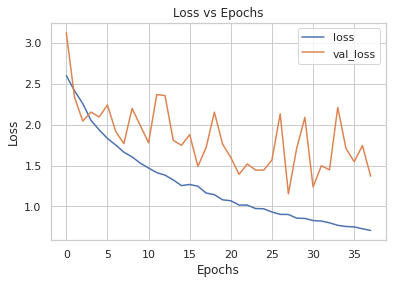

In [ ]:
# Gráfica las pérdidas del modelo.
plt.figure(figsize=(12,6))
loss_plot = df.plot(y=["loss", "val_loss"], title = "Loss vs Epochs", legend=True)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

Asimismo, se graficarán la **precisión (accuracy)** de los datos de entrenamiento y de validación en cada ***epoch***.

<Figure size 864x432 with 0 Axes>

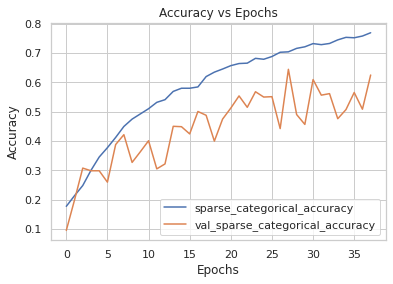

In [ ]:
# Gráficar los valores de precisión del modelo.
plt.figure(figsize=(12,6))
acc_plot = df.plot(y=["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"], 
                   title="Accuracy vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

Dados los resultados de entrenamiento y de validación, se procedió a corroborar con los datos de prueba para revisar que, en efecto, no se estaba haciendo un sobreajuste.

In [ ]:
# Evaluar el modelo.
model.evaluate(test_images,test_labels)

104/104 [==============================] - 2s 16ms/step - loss: 1.1760 - sparse_categorical_accuracy: 0.6276


[1.1760220527648926, 0.6276112794876099]

Asimismo, se consideró propio analizar la precisión para cada una de las clases.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
target_names_ = ['apple_pie', 'cheesecake', 'chicken_curry', 'french_fries', 
          'fried_rice', 'hamburger', 'hot_dog', 'ice_cream', 'omelette', 'pizza','sushi']

print("Classification Report\n",classification_report(test_labels,y_pred_classes,target_names=target_names_))


104/104 [==============================] - 1s 12ms/step
Classification Report
                precision    recall  f1-score   support

    apple_pie       0.41      0.57      0.48       304
   cheesecake       0.65      0.67      0.66       300
chicken_curry       0.62      0.71      0.66       315
 french_fries       0.73      0.84      0.78       313
   fried_rice       0.86      0.65      0.74       297
    hamburger       0.59      0.54      0.56       290
      hot_dog       0.57      0.55      0.56       321
    ice_cream       0.51      0.58      0.54       304
     omelette       0.66      0.50      0.57       304
        pizza       0.73      0.74      0.74       285
        sushi       0.79      0.56      0.65       270

     accuracy                           0.63      3303
    macro avg       0.65      0.63      0.63      3303
 weighted avg       0.64      0.63      0.63      3303



La mayoria de las clases tuvieron 60% o más de precisión, a excepción de apple pie (41%), hamburguer (59%), hot_dog (57%) y ice_cream (51%). En general, no es un mal modelo, pero no es el más indicado para la toma de decisiones.

Luego, se decidió corroborar la precisión del modelo al visualizar cómo clasificó cada clase y cuál era su categoría real.

In [ ]:
def prediction(pred,labels):
  """ Gráfica las probabilidades de que una imagen sea una categoría en específico.

  args:
    pred: Valores de predicción del modelo de que sea una categoría en particular.
    labels: Etiquetas de sus valores reales.
  """
  # Crear un dataframe con las probabilidades para cada categoría.
  df = pd.DataFrame(pred, columns=labels)
  df = df.T.reset_index()
  df.columns = ['labels','values']
  df = df.sort_values(by='values',ascending=False)

  sns.set(style="whitegrid")
  plt.figure(figsize=(12,6))

  # Gráficos de barras con la respectiva probabilidad de cada categoría.
  ax = sns.barplot(data=df, x="labels",y="values")

  # Bucle para mostrar el valor de su probabilidad encima de cada barra.
  for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.4f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center")
    
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
# Lista de las clases en el conjunto de datos.
clases = ['apple_pie', 'cheesecake', 'chicken_curry', 'french_fries', 
          'fried_rice', 'hamburger', 'hot_dog', 'ice_cream', 'omelette', 'pizza','sushi']

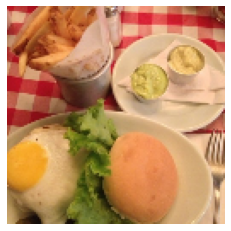

Label: hamburger
Model: sushi


In [ ]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]

plt.axis('off')
plt.imshow(test_image)
plt.show()
print(f"Label: {clases[test_labels[random_inx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...],verbose=0) # Agregar una dimensión, porque el modelo necesita un arreglo cuadrimensional.
print("Model:", clases[np.argmax(pred)])

Además, para una mejor comprensión del algoritmo, se visualizaron las probabilidades de que fuera cada categoría.

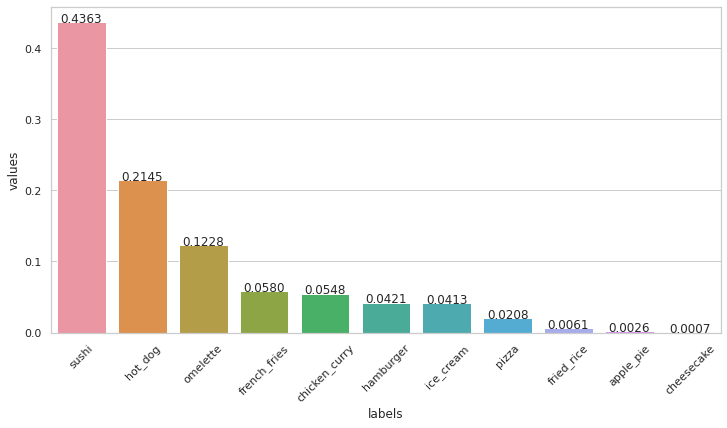

In [ ]:
prediction(pred,clases)

Una imagen que refiere a una hamburguesa fue clasificada como sushi. El modelo determinó que la probabilidad de que fuera un sushi era del 43.63%, hot_dog del 21.45% y hamburguesa 4.21%. Es decir, estuvo muy alejado de indicar que era, en efecto, una hamburguesa. 

Por último, se repitió lo descrito previamente para otras diez imágenes aleatorias.

---------------------------------------------------------------------------------------
Imágen 1


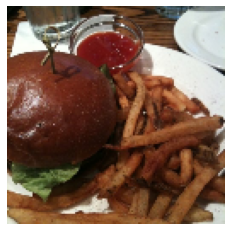

Label: hamburger
Model: hamburger


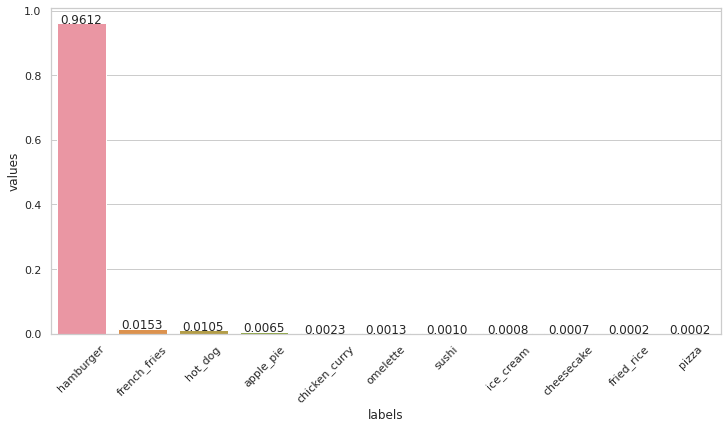

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 2


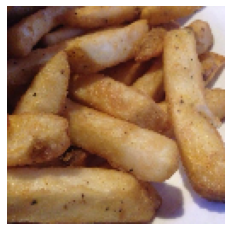

Label: french_fries
Model: french_fries


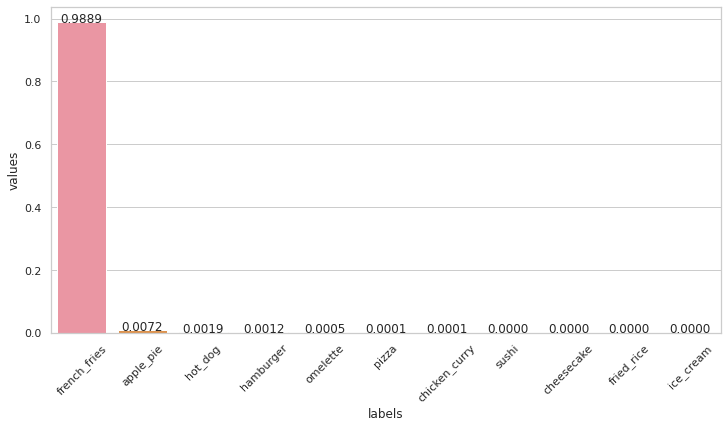

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 3


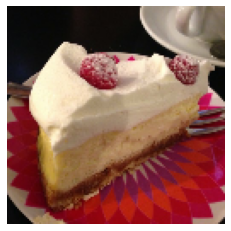

Label: cheesecake
Model: hot_dog


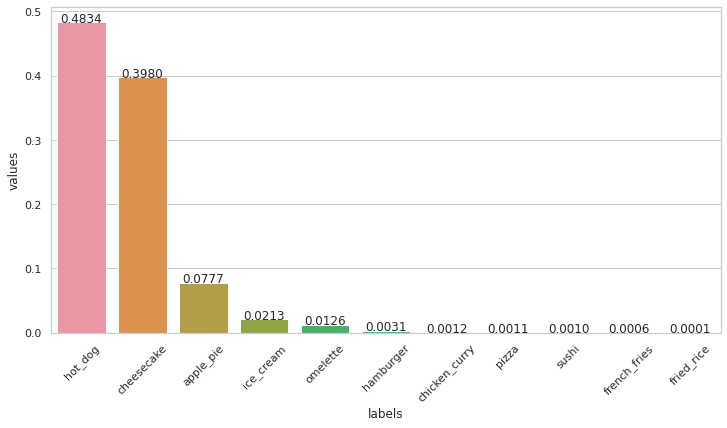

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 4


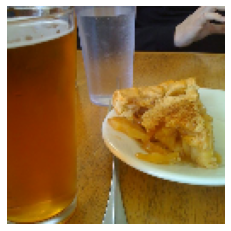

Label: apple_pie
Model: apple_pie


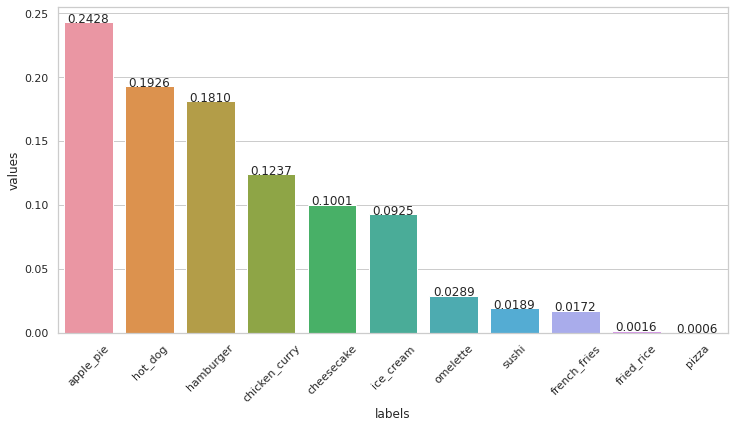

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 5


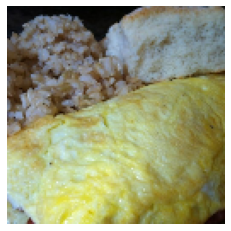

Label: omelette
Model: omelette


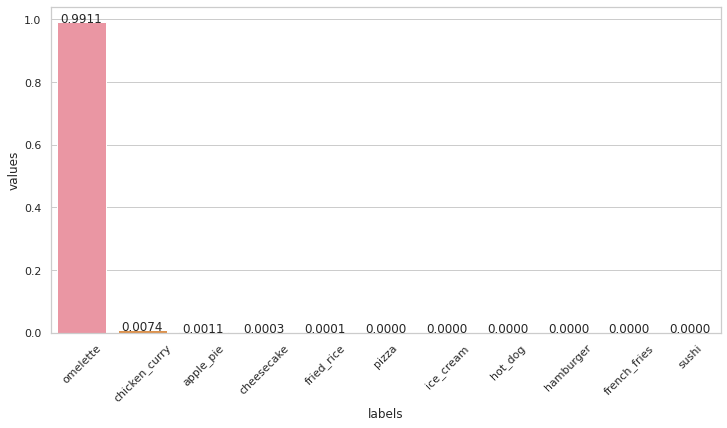

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 6


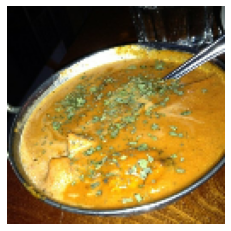

Label: chicken_curry
Model: chicken_curry


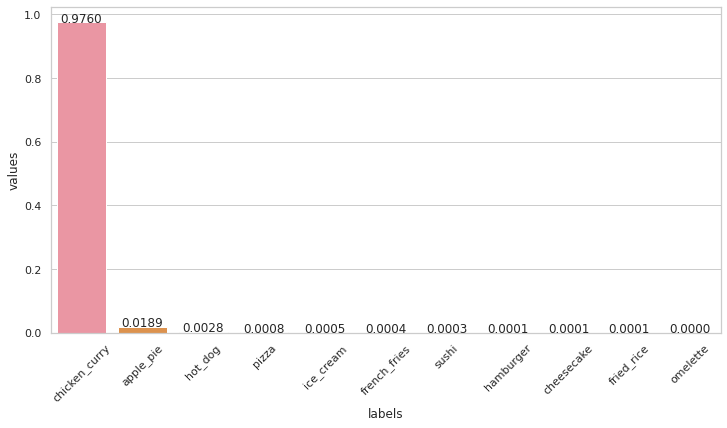

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 7


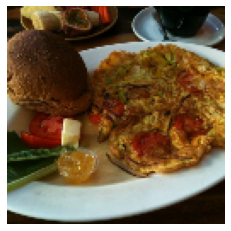

Label: omelette
Model: chicken_curry


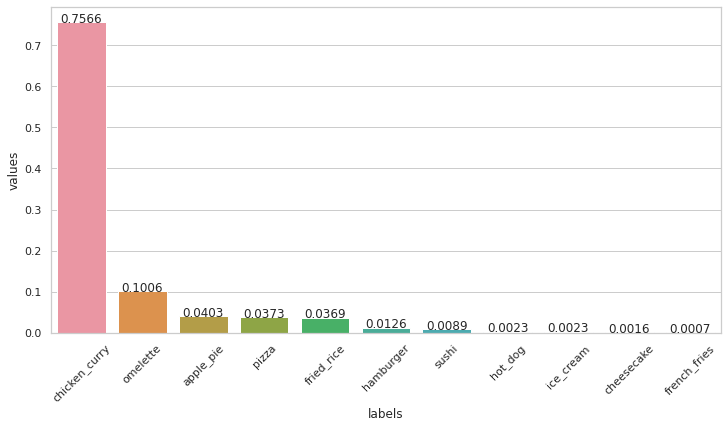

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 8


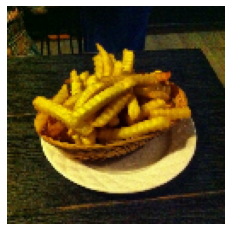

Label: french_fries
Model: french_fries


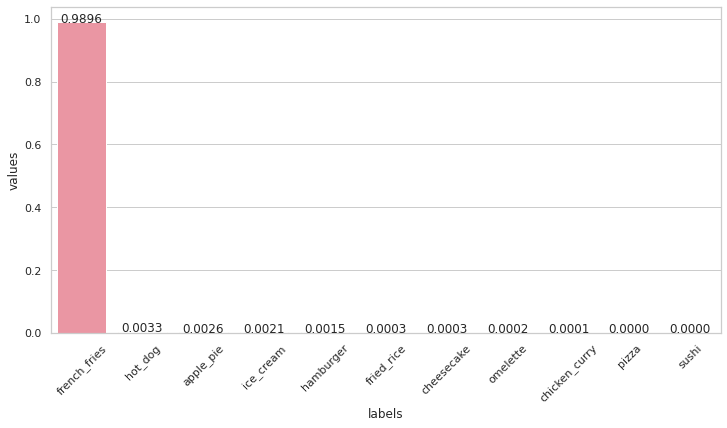

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 9


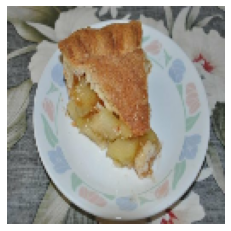

Label: apple_pie
Model: apple_pie


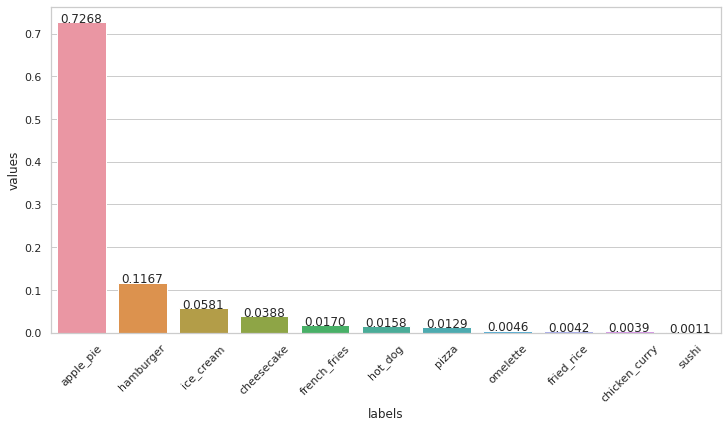

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 10


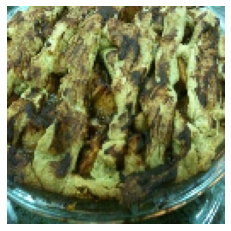

Label: apple_pie
Model: ice_cream


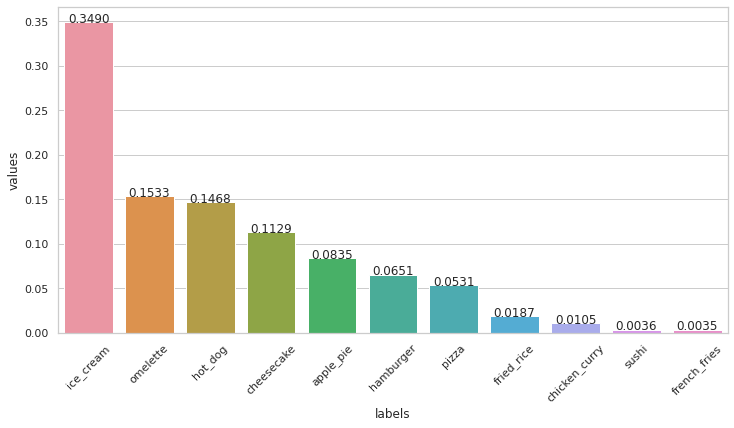

---------------------------------------------------------------------------------------


In [ ]:
for i in range(10):
  print("---------------------------------------------------------------------------------------")
  print("Imágen " + str(i+1))
  random_inx = np.random.choice(test_images.shape[0])
  test_image = test_images[random_inx]
  pred = model.predict(test_image[np.newaxis,...],verbose=0) # Get the model predictions

  # Gráficar la categoría verdadera y la predecida
  plt.axis('off')
  plt.imshow(test_image)
  plt.show()

  print(f"Label: {clases[test_labels[random_inx]]}")
  print("Model:", clases[np.argmax(pred)])

  # Gráfico de barras de las probabilidades empleadas para la predicción.
  prediction(pred,clases)
  print("---------------------------------------------------------------------------------------")

El modelo clasificó incorrectamente la tercera, séptima y décima imagen. Mostrando así que no es un mal modelo, pero que aún tiene diversas áreas de oportunidad.

## Conclusiones

El segundo modelo mostró resultados satisfactorios. Si bien estaba empezando a hacer un sobreajuste, la técnica de Early Stopping impidió que hiciera epochs innecesarios. Asimismo, implementar técnicas como BatchNormalization, Dropout y Data Augmentation fueron esenciales para mejorar la precisión del modelo y evitar un sobreajuste en la medida de lo posible.

El modelo no es el más fiable, pero sus resultados son satisfactorios para la clasificación de la mayoría de las clases. *Fried_rice* es la clase con mayor precisión (86%), mientras que *apple_pie* mostró los peores resultados (41%). Además, se aprecia que el rendimiento apróximado del modelo es del 60%, que a diferencia del modelo 01, representó una mejora significativa. 

Podría intentarse implementarse más capas, alterar el número de neuronas de cada capa y/o conseguir más datos para su entrenamiento. No obstante, hay que considerar que lo dicho previamente puede requerir un mayor costo computacional, sobre todo el aumentar el número de capas, por lo que hay que prestar especial atención de no consumir todos los recursos del equipo, o bien, ir guardando los pesos (*weights*) de cada *epoch* y hacer que el modelo continúe su entrenamiento al cargar esos valores.